
***

# R2.09 
## CM 4
***
***
Le but de ce TP est d'effectuer une étude complète d'un problème de point fixe
***
***


In [1]:
#import divers, ne pas prendre en compte
import math
import numpy as np
import matplotlib.pyplot as plt

#magic
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')


from sympy import *
#on va manuipuler des peeeetits nombres

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

In [3]:
from scipy.special import lambertw

W = lambertw(1)

print(W) 

(0.5671432904097838+0j)


## Recherche de point fixe $x = e^{-x}$



On cherche à trouver $\varpi = e^{- \varpi}$


Cherchons déjà à voir si un tel réel existe.

<IPython.core.display.Javascript object>


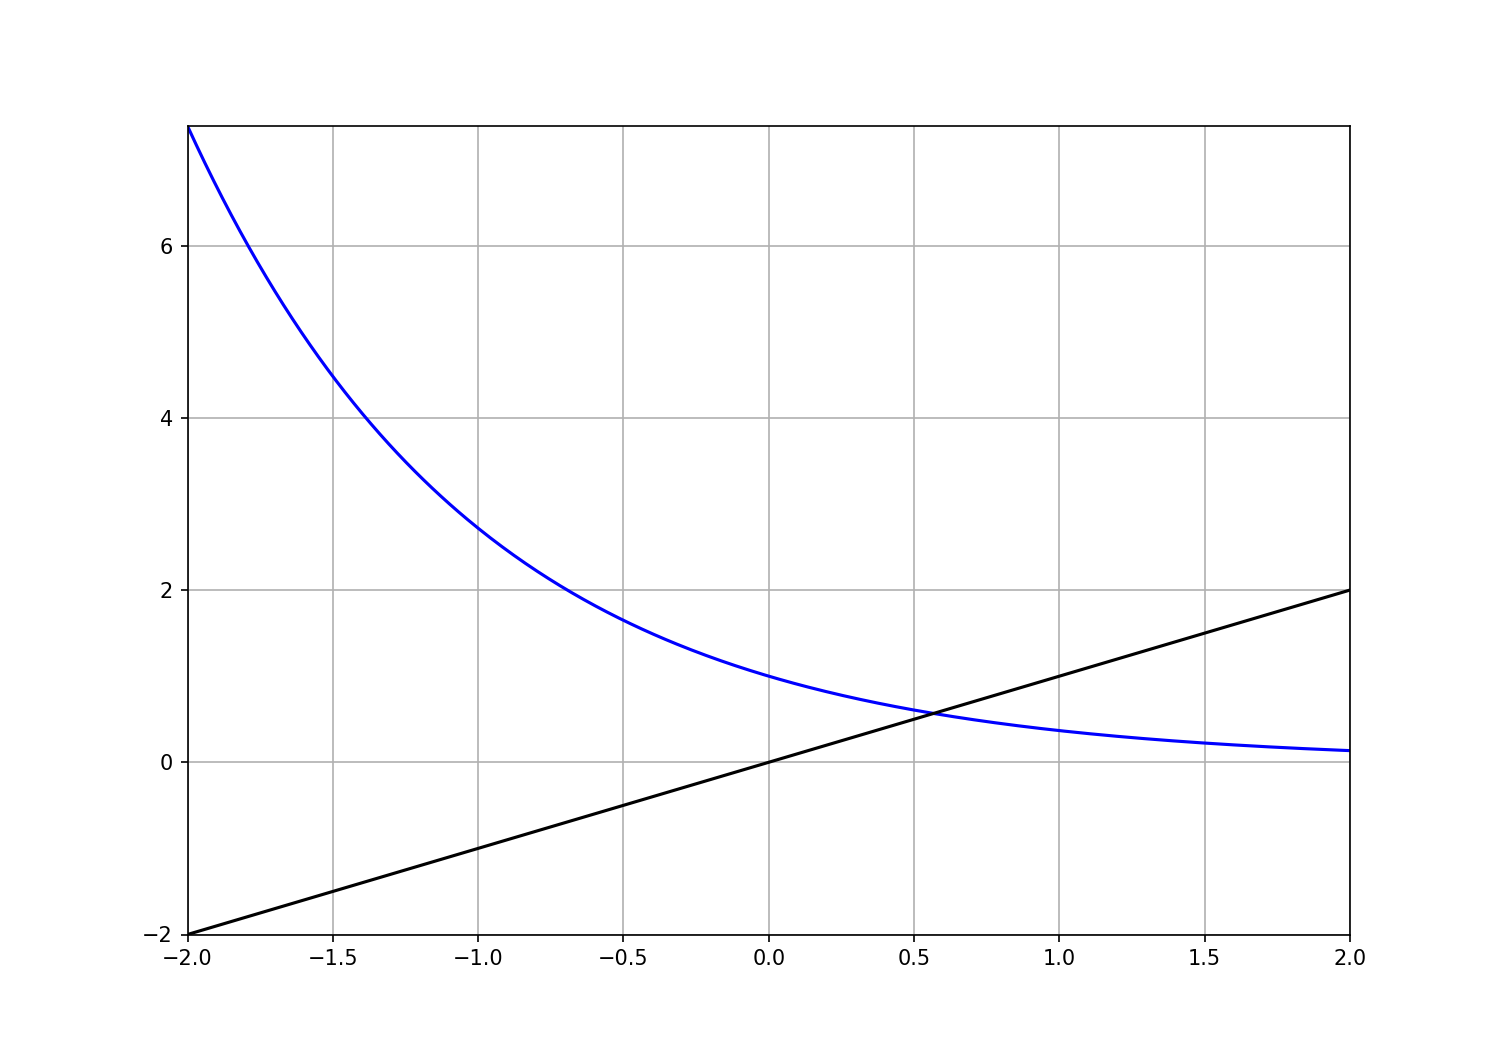

In [4]:
plt.close()

def f(x): 
    return np.exp(-x) 

a=-2
b=2
xs = np.linspace(a,b, 400)
plt.axis([a, b, min(a,f(a),f(b)), max(b,f(b),f(a))])
plt.plot(xs, [f(x) for x in xs], 'b')
plt.plot(xs, xs, 'k')
plt.grid()
plt.show()


### Recherche de la solution


On se ramène à une recherche de racine :


$$ x= e^{-x}  \: \Longleftrightarrow \: e^{-x} - x = 0$$ 

In [5]:
def g(x): 
    return np.exp(-x)-x 




<IPython.core.display.Javascript object>


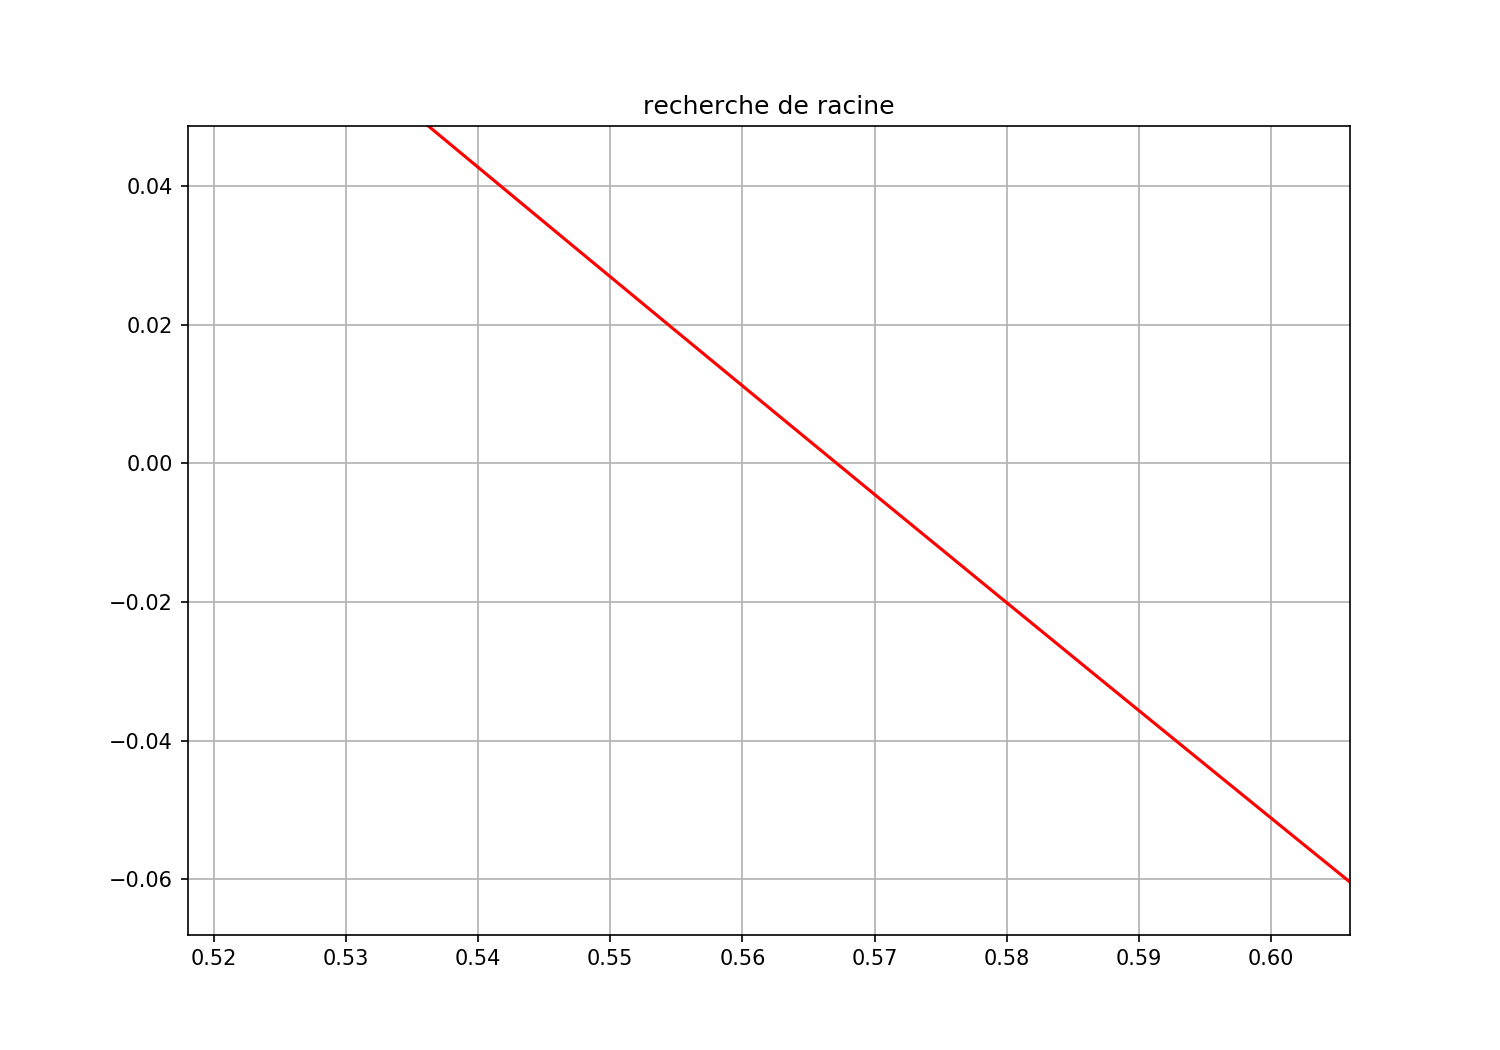

In [6]:
plt.close()

rg = np.linspace(-2, 2,1000)
s1 = [g(x) for x in rg]
#plt.axis([0, 20, 0, 3])



plt.title('recherche de racine')
plt.plot(rg, s1, 'r')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


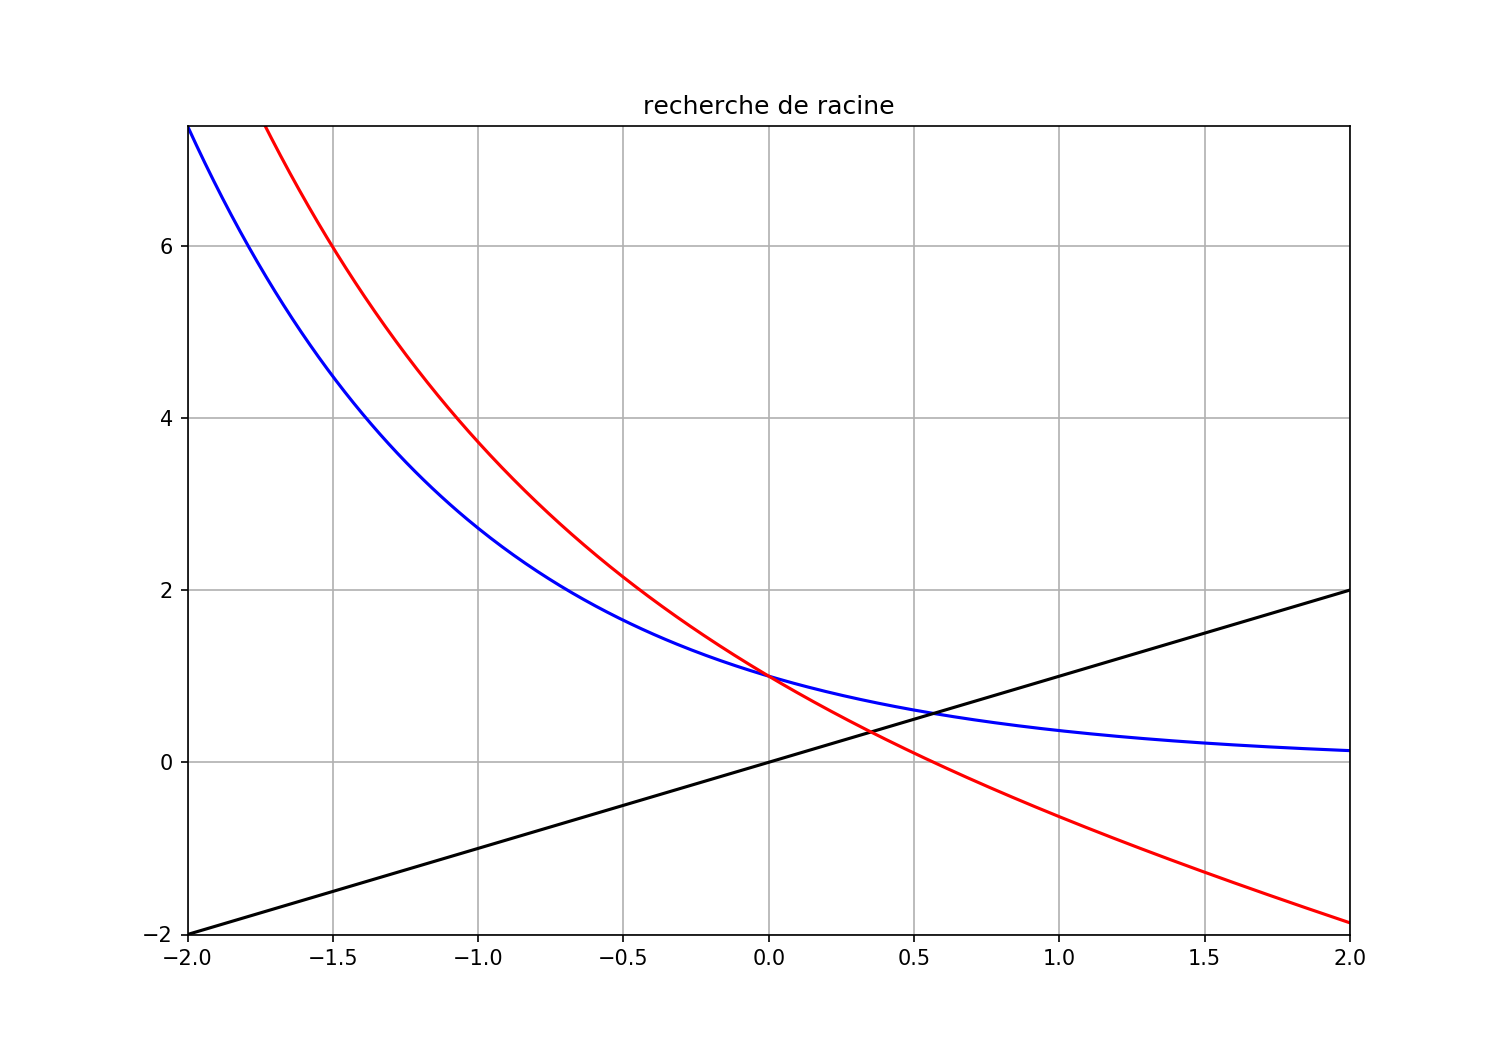

In [7]:
plt.close()

rg = np.linspace(-2, 2,1000)
s1 = [g(x) for x in rg]
#plt.axis([0, 20, 0, 3])

a=-2
b=2
xs = np.linspace(a,b, 400)
plt.axis([a, b, min(a,f(a),f(b)), max(b,f(b),f(a))])
plt.plot(xs, [f(x) for x in xs], 'b')
plt.plot(xs, xs, 'k')

plt.title('recherche de racine')
plt.plot(rg, s1, 'r')
plt.grid()
plt.show()

In [ ]:
print("g(-2)",g(-2))
print("g(2)",g(2))



La fonction $g$ est _continue_, donc d'après le **théorème des valeurs intermédiaires** il existe un certain réel $-2 \leq \varpi \leq 2$ tel que $g(\varpi) = 0$


On peut commencer par chercher la solution par dichotomie : 

Iteration 1, c = 0.0000000 and f(c) = 1.0000000
Iteration 2, c = 1.0000000 and f(c) = -0.6321206
Iteration 3, c = 0.5000000 and f(c) = 0.1065307
Iteration 4, c = 0.7500000 and f(c) = -0.2776334
Iteration 5, c = 0.6250000 and f(c) = -0.0897386
Iteration 6, c = 0.5625000 and f(c) = 0.0072828
Iteration 7, c = 0.5937500 and f(c) = -0.0414975
Iteration 8, c = 0.5781250 and f(c) = -0.0171758
Iteration 9, c = 0.5703125 and f(c) = -0.0049638
Iteration 10, c = 0.5664062 and f(c) = 0.0011552
Iteration 11, c = 0.5683594 and f(c) = -0.0019054
Iteration 12, c = 0.5673828 and f(c) = -0.0003753
Iteration 13, c = 0.5668945 and f(c) = 0.0003899
Iteration 14, c = 0.5671387 and f(c) = 0.0000072
Iteration 15, c = 0.5672607 and f(c) = -0.0001841
Iteration 16, c = 0.5671997 and f(c) = -0.0000884
Iteration 17, c = 0.5671692 and f(c) = -0.0000406
Iteration 18, c = 0.5671539 and f(c) = -0.0000167
Iteration 19, c = 0.5671463 and f(c) = -0.0000047
Iteration 20, c = 0.5671425 and f(c) = 0.0000013
Iteration 21, c 

<IPython.core.display.Javascript object>


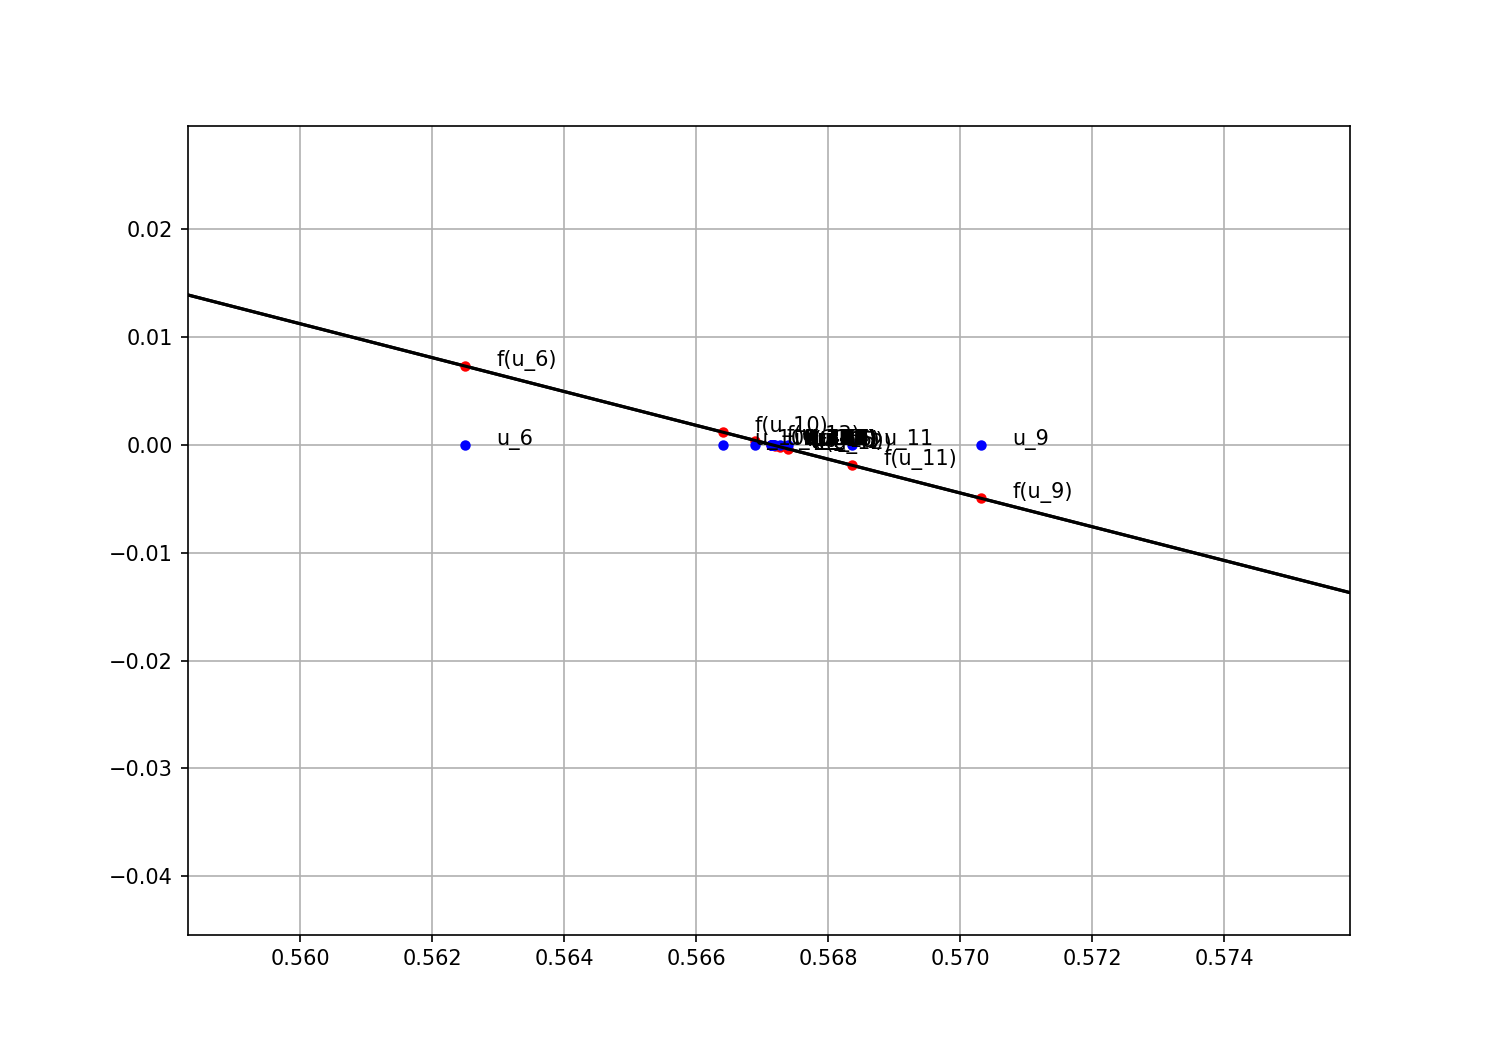

In [8]:
plt.close()

def dichotomie(f, a, b, epsilon=10**(-8),plot=False):
    c = (a + b) / 2
    cpt = 0
    c_list=[c]
    a0=a
    b0=b
    while abs(b - a) > epsilon:
        cpt = cpt + 1
        c = (a + b) / 2
        if f(a) * f(c) <= 0:
            b = c
        else:
            a = c
        c_list.append(c)
        print('Iteration %d, c = %0.7f and f(c) = %0.7f' % (cpt, c, f(c)))
    if plot:    
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(a0,b0,.0001),[f(i) for i in np.arange(a0,b0,.0001)],'k')
        plt.plot(c_list,[f(i) for i in c_list],'ro', markersize=4)
        plt.plot(c_list,[0 for i in c_list],'bo', markersize=4)
        plt.plot(np.arange(a0,b0,.0001),[f(i) for i in np.arange(a0,b0,.0001)],'k')
       
        #for xy in zip(c_list,[f(i) for i in c_list]):                                       # <--
        #    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
        for i in range(len(c_list)): 
            ax.annotate('u_%s' %i, xy=(c_list[i],0), xytext=(15,0), textcoords='offset points')
            ax.annotate('f(u_%s)' %i, xy=(c_list[i],f(c_list[i])), xytext=(15,0), textcoords='offset points')
            
        plt.grid()
        plt.show()
    return (c_list, cpt)


c_dich,cpt=dichotomie(g,-2,2,10**(-12),True)

Tracé de l'erreur

<IPython.core.display.Javascript object>


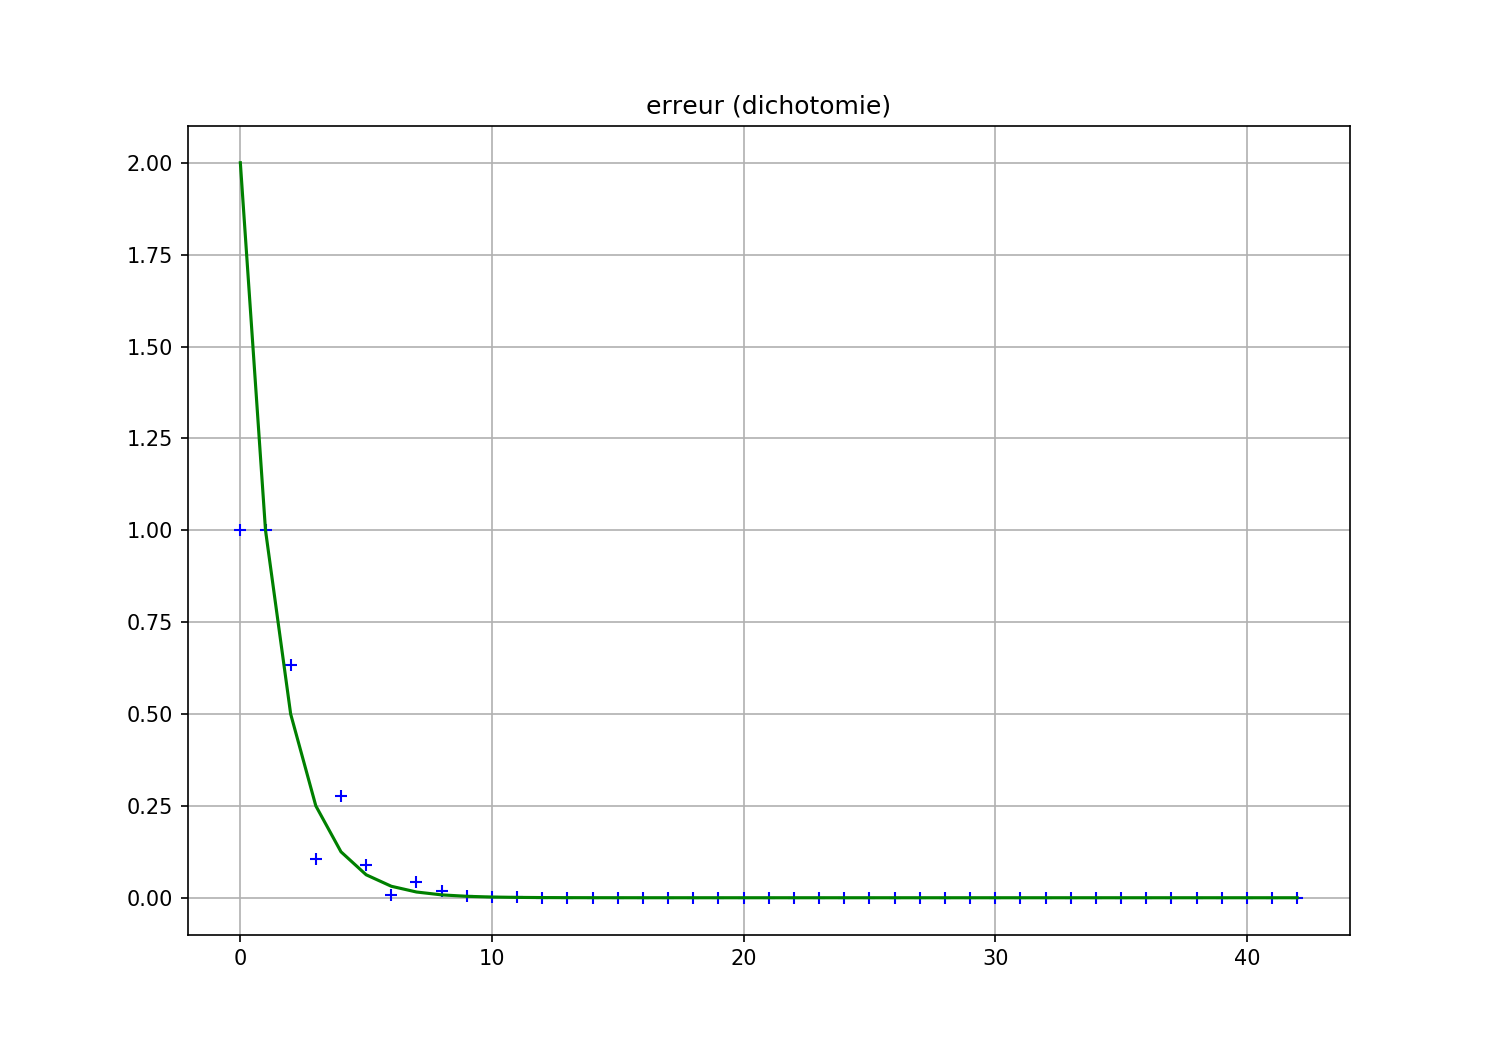

In [12]:

plt.close()
e_dicho = [np.abs(g(x)) for x in c_dich]


shift=0

plt.plot(range(shift,len(c_dich)), [np.abs(g(c_dich[i])) for i in range(shift,len(c_dich))], 'b+')
plt.plot(range(shift,len(c_dich)), [2*.5**i for i in range(shift,len(c_dich))], 'g')

#plt.plot(range(len(c_dich)), [np.abs(f(x)) for x in c_dich], 'b+')


plt.title('erreur (dichotomie)')
plt.grid()
plt.show() 

In [ ]:

plt.close()


alpha=1

plt.plot(range(len(c_dich)-1), [g(c_dich[i+1])/g(c_dich[i])**alpha for i in range(len(c_dich)-1)], 'b+')



#plt.plot(range(len(c)), [np.abs(f(x)) for x in c], 'b+')


plt.title('erreur (dichotomie)')
plt.grid()
plt.show() 

## Méthode du point fixe

on revient sur $x = e^{-x}$, c'est un point fixe, on peut le trouver facilement si la fonction $f$ est _contractante_

In [15]:
def contract_test(f,a,b,k=500):
    xs = np.linspace(a, b, k)
    ys = np.linspace(a, b, k)
    K=0
    for x in xs:
        for y in ys:
            if np.abs(x-y) < np.abs(f(x)-f(y)):
                return [x,y]
            else :
                if x!=y:
                    K=max(K,np.abs(f(x)-f(y))/np.abs(x-y) )
    return K
contract_test(f,0.1,.9)


0.9041124849179261

En effet, $f'(x) = -e^{-x}$ donc $f$ est contractante sur (par exemple $[0,1 ; 2]$ (stable par $f$)

In [26]:
print(np.exp(-.9))
print(np.exp(-.57))

0.4065696597405991
0.5655254386995371


<IPython.core.display.Javascript object>


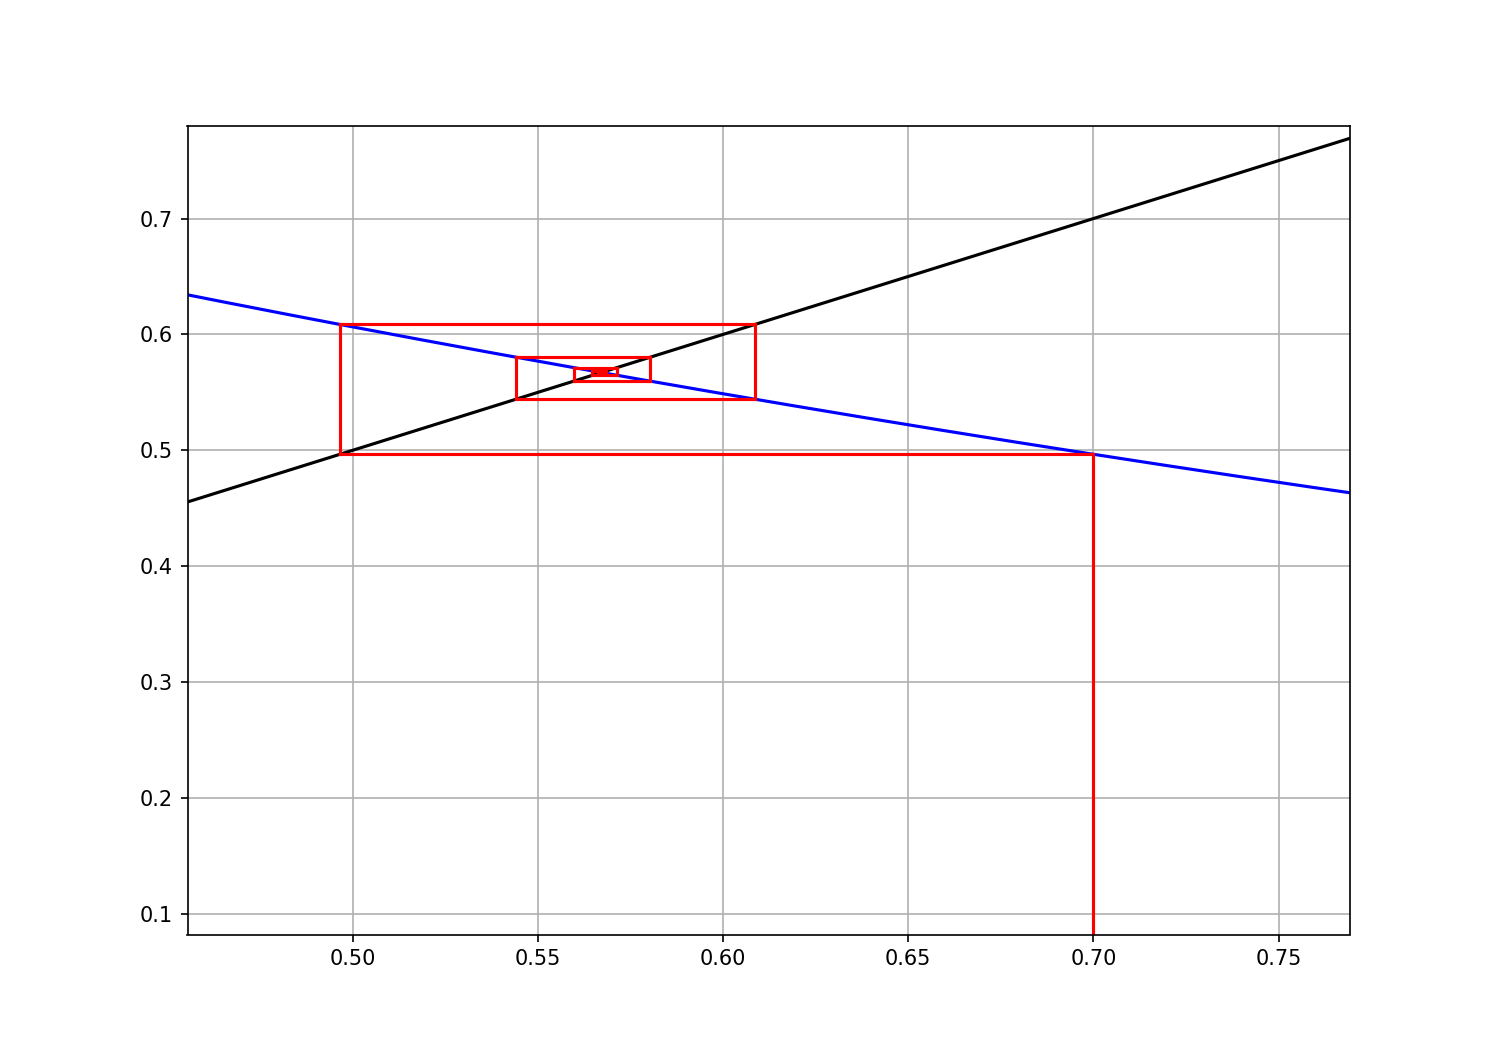

In [21]:
plt.close()

def escalier(f, a, b, c, d, x0, n):
    xs = np.linspace(a, b, 200)
    ys = [f(x) for x in xs]
    pad = 0.
    plt.axis([a - pad, b + pad, c - pad, d + pad])
    plt.plot(xs, ys, 'b')
    plt.plot(xs, xs, 'k')
    x = x0
    coul = 'r'
    plt.plot([x0, x0], [0, f(x0)], coul)
    for k in range(n):
        plt.plot([x, f(x)], [f(x), f(x)], coul)
        plt.plot([f(x), f(x)], [f(x), f(f(x))], coul)
        x = f(x)
    plt.grid()
    plt.show()
    
    
escalier(lambda  x: np.exp(-x), .1, .9, -1, 1, .7, 100)

<IPython.core.display.Javascript object>


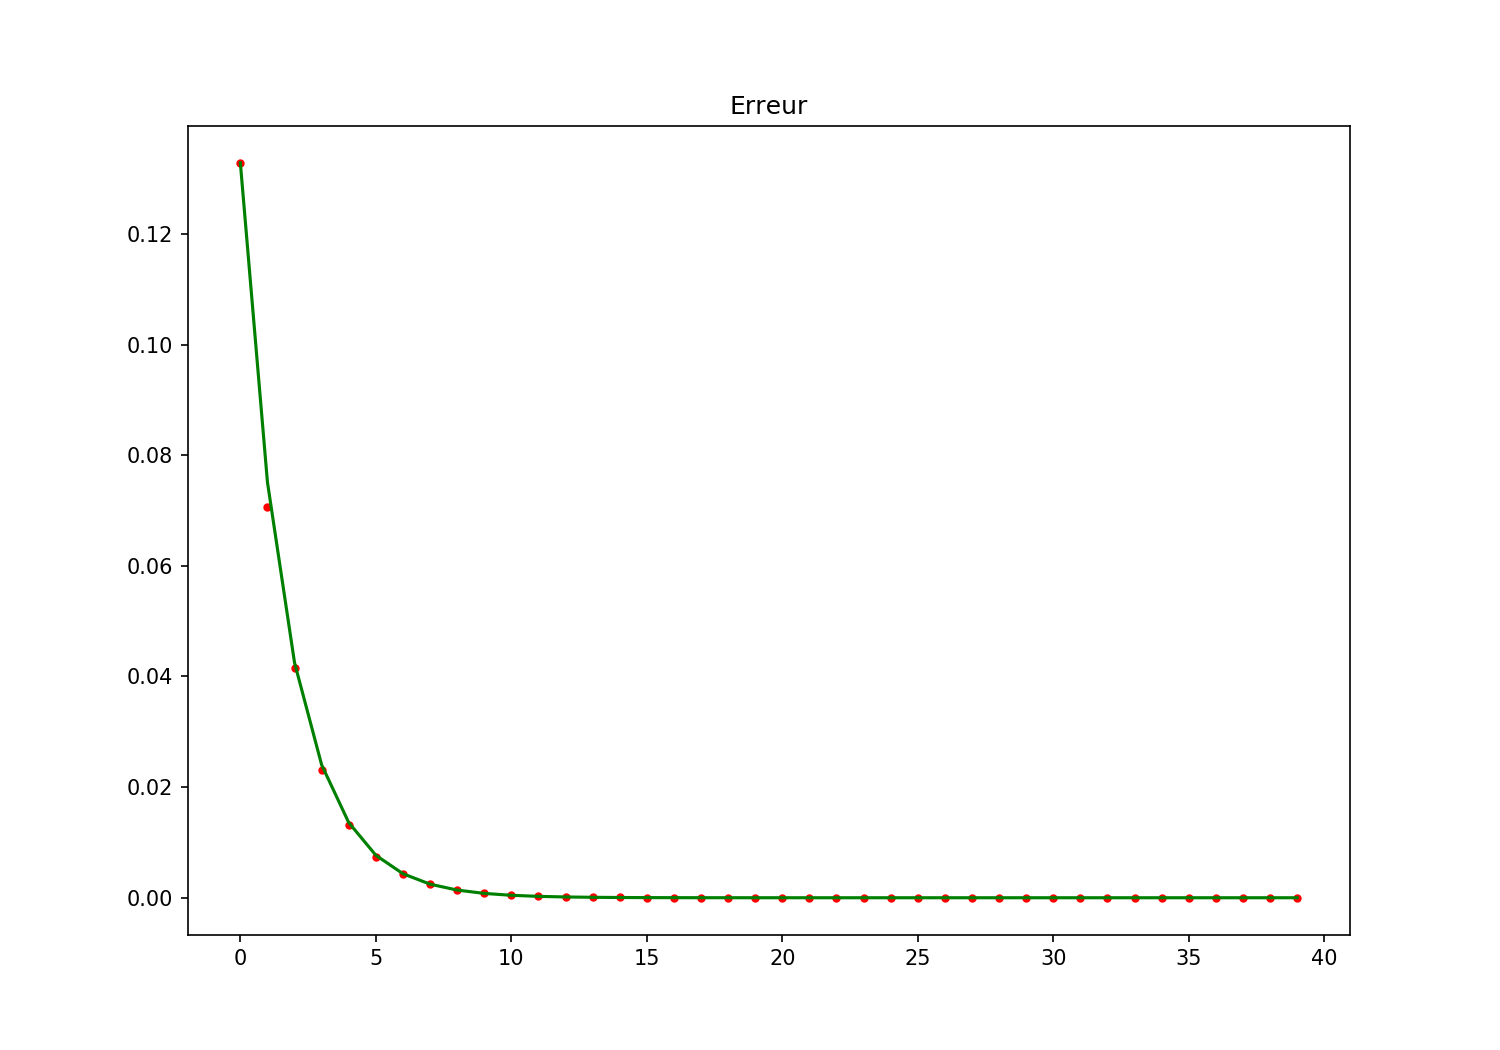

In [27]:
plt.close()

def un(n,a=.7):
    if n==0:
        return a
    else:
        return np.exp(-un(n-1,a))
shift=0
rg = range(shift,40)
s1 = [np.abs(un(n)-W) for n in rg]
s2 = [np.abs(un(shift)-W)*.5655**(n-shift) for n in rg] 
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.plot(rg, s1, 'ro', markersize=3)
plt.plot(rg, s2, 'g')

plt.show()

<IPython.core.display.Javascript object>


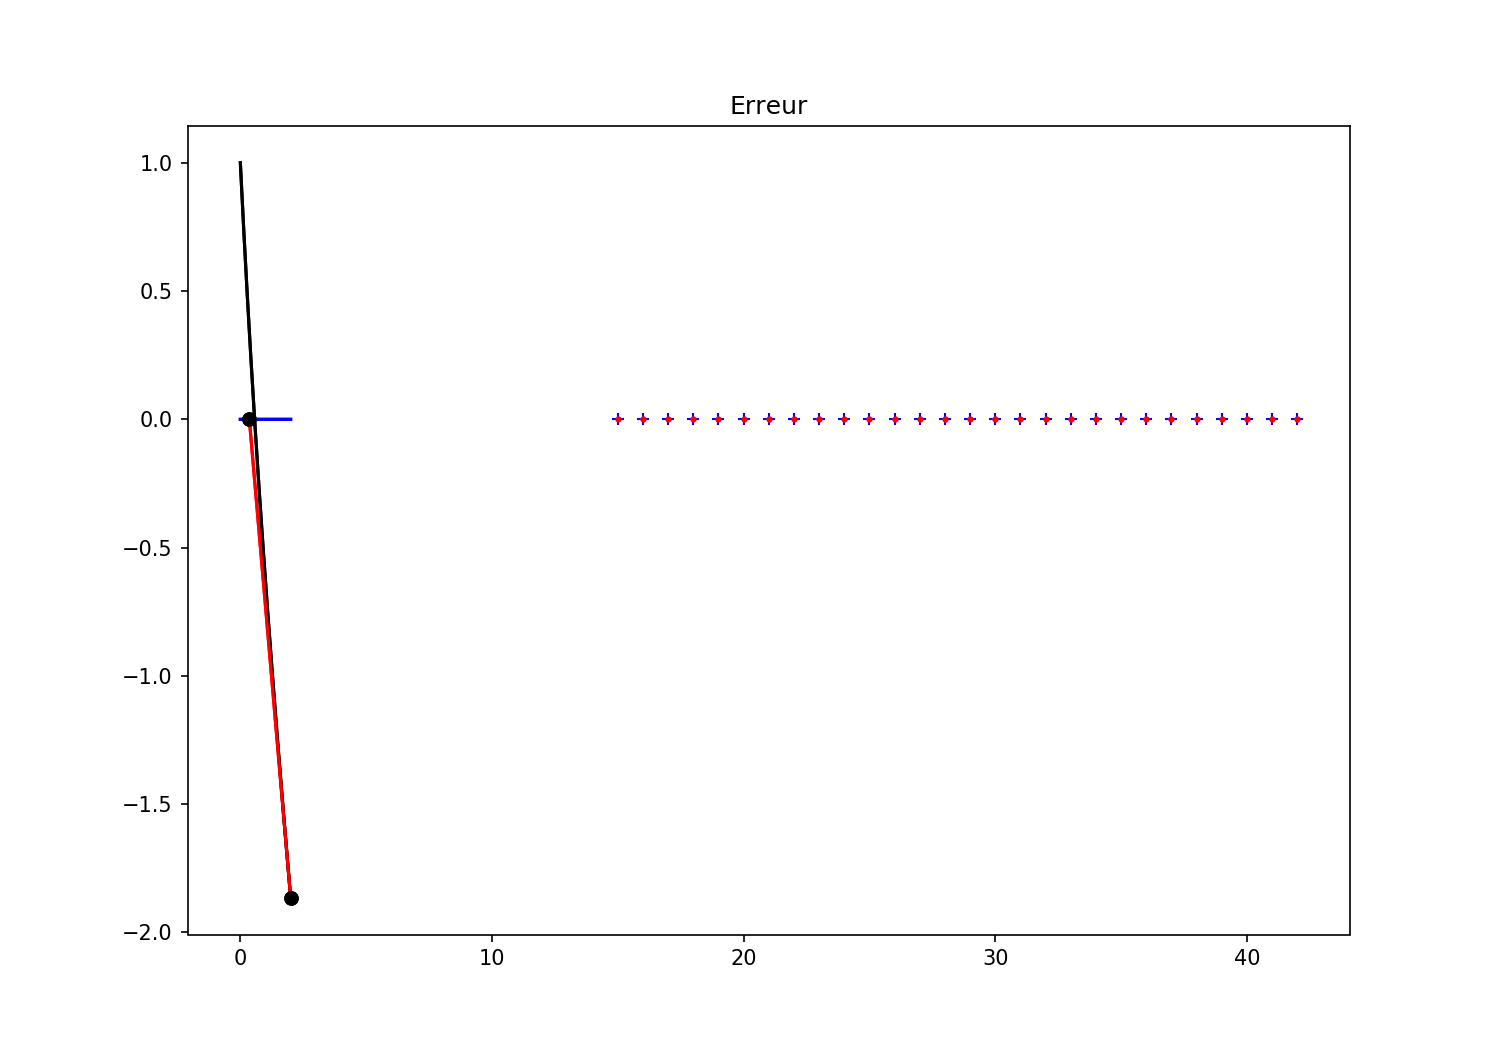

In [29]:
plt.close()

def un(n,a=2):
    if n==0:
        return a
    else:
        return np.exp(-un(n-1,a))

shift=15


plt.plot(range(shift,len(c_dich)), [np.abs(g(c_dich[i])) for i in range(shift,len(c_dich))], 'b+')
rg = range(0,30)
plt.plot(range(shift,len(c_dich)), [np.abs(un(n)-W) for n in range(shift,len(c_dich))], 'ro',markersize=2)

#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.show()



## Méthode de Newton

In [30]:
def deriv(f, x, h=1e-7):
    return (f(x + h) - f(x - h)) / (2 * h)


deriv(lambda x: np.exp(x), 0)

0.9999999994736442

<IPython.core.display.Javascript object>


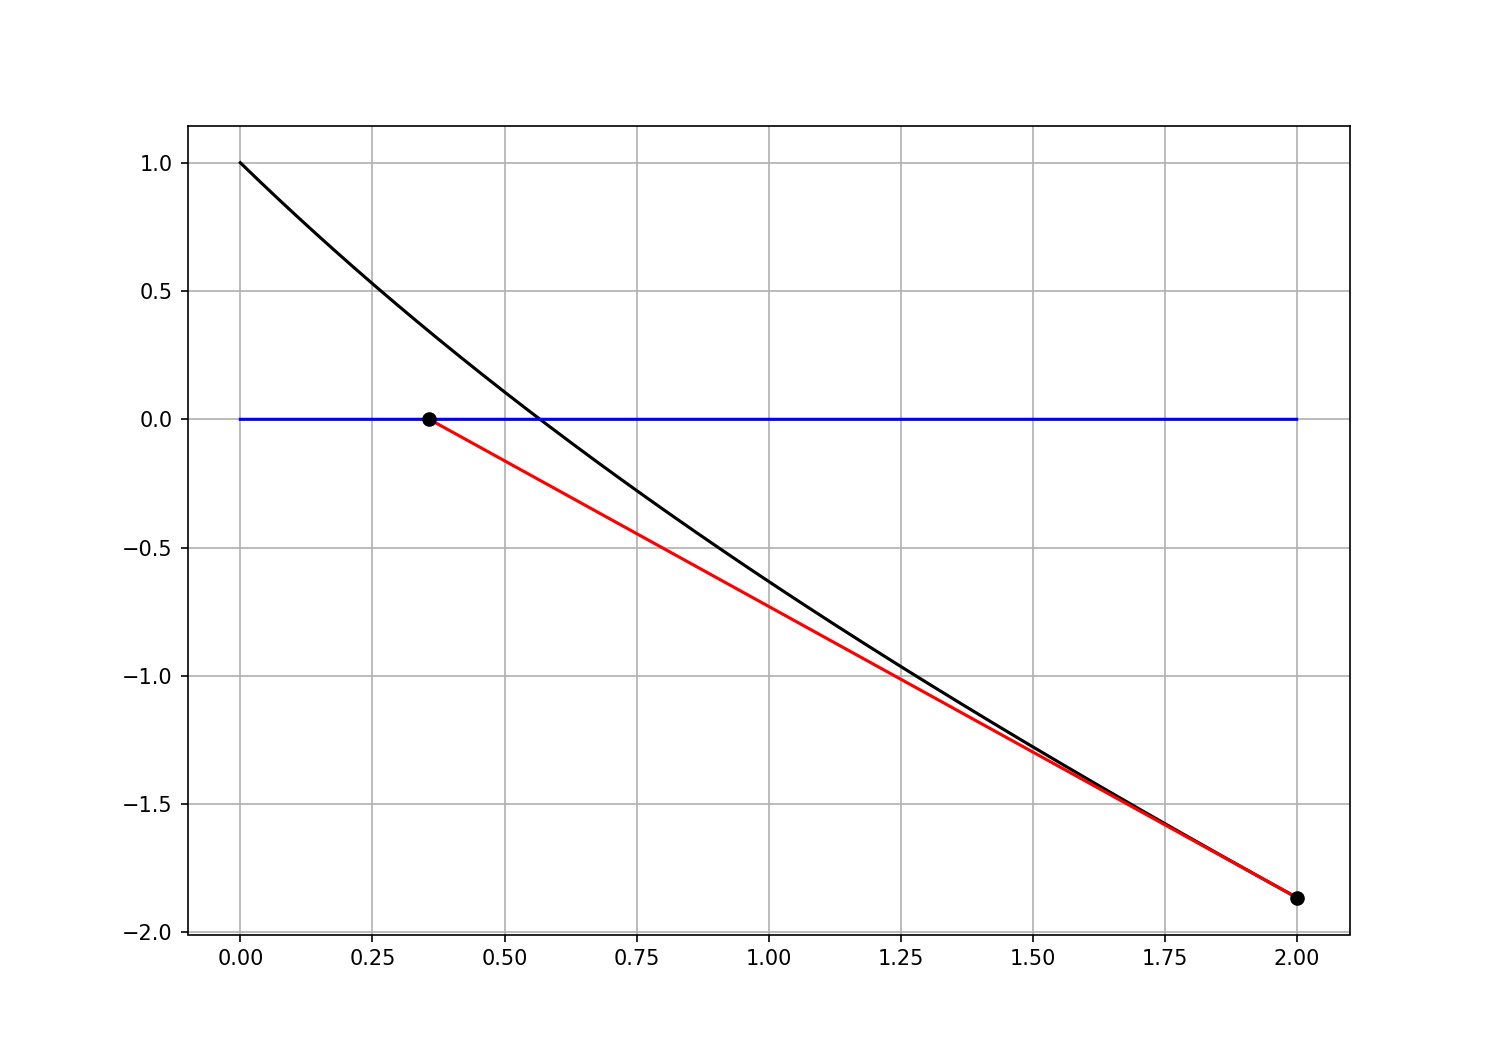

In [33]:
plt.close()


xs = np.arange(0,2,1/1000)
f = lambda x: np.exp(-x)-x
ys = [f(x) for x in xs]
plt.plot(xs, ys, 'k')
plt.plot(xs, [0 for x in xs], 'b')
x = 2
x1 = x - f(x) / deriv(f, x) 
plt.plot([x, x1], [f(x), 0], 'r')
plt.plot([x],[f(x)],'ko')
plt.plot([x1],[0],'ko')
plt.grid()
plt.show()

Iteration 1, c = 0.3576088 and f(c) = 0.3417379
Iteration 2, c = 0.5587083 and f(c) = 0.0132390
Iteration 3, c = 0.5671304 and f(c) = 0.0000202
Iteration 4, c = 0.5671433 and f(c) = 0.0000000
Iteration 5, c = 0.5671433 and f(c) = 0.0000000


<IPython.core.display.Javascript object>


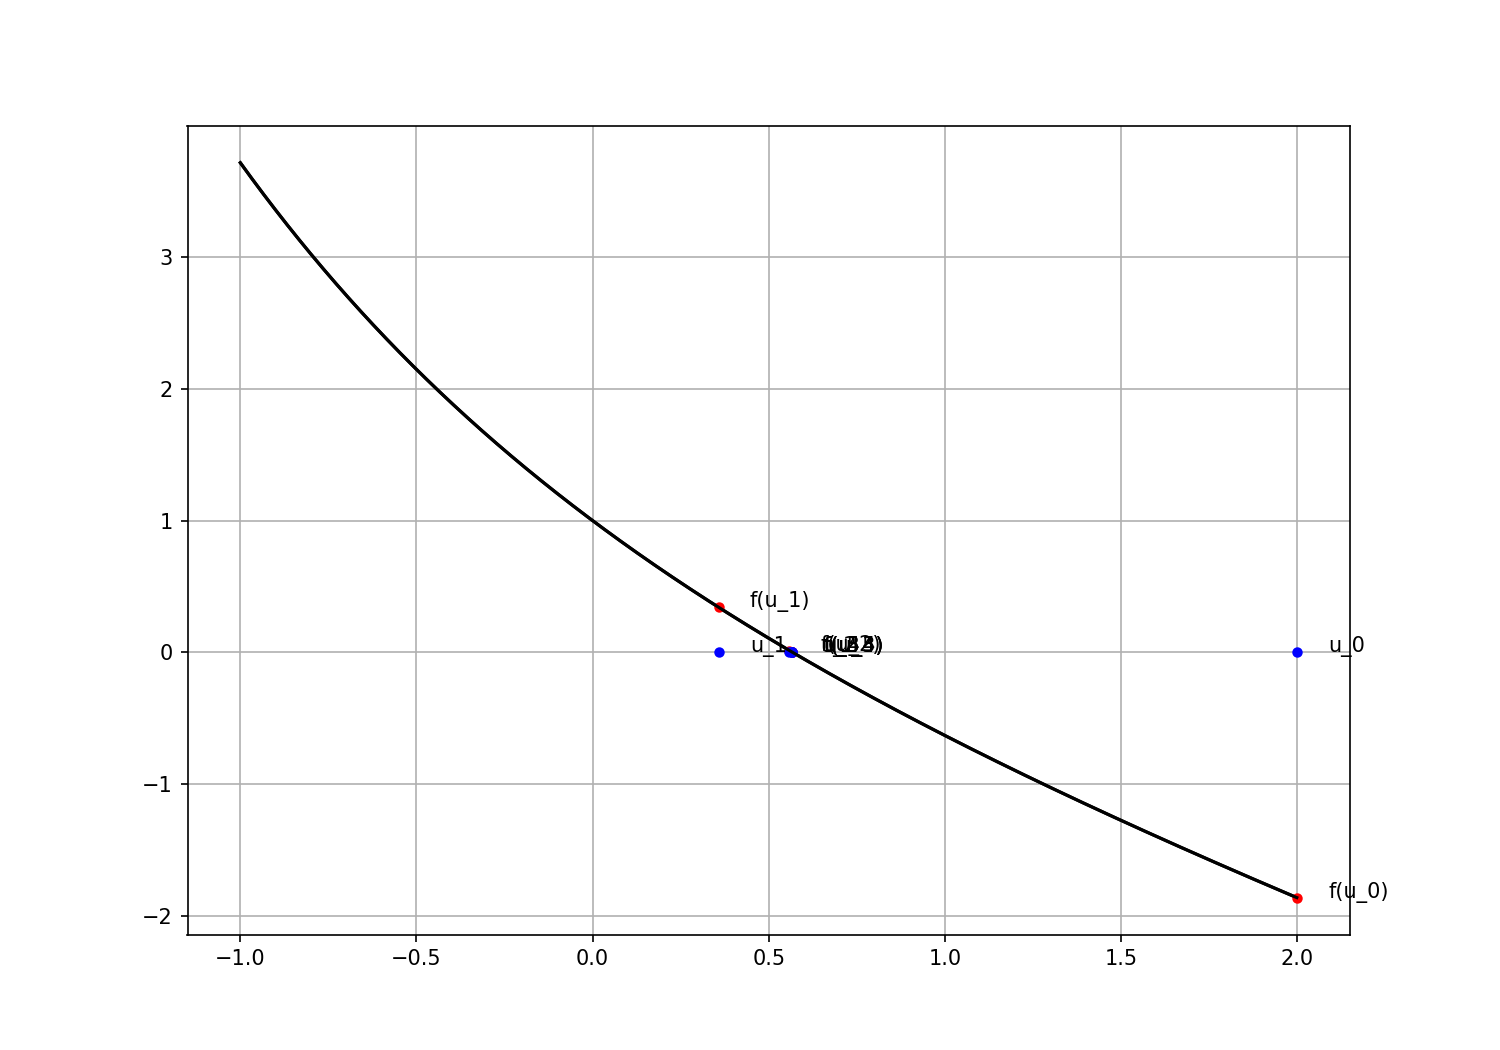

0j

In [34]:
plt.close()

def intersection(f,a,b):
    return b - (b-a)/(f(b)-f(a))*f(b)


def tangente_intersection(f, a, h=1e-7):
    return a - f(a)/deriv(f,a,h)

def Newton(f,x0,epsilon,plot=False,h=1e-7,r=1,xm=-1,xM=2):
    c = x0
    a=x0
    cpt = 0
    c_list=[c]
    a0=a
    while abs(f(c)) > epsilon:
        cpt = cpt + 1
        c = tangente_intersection(f, a, h=1e-7)
        a=c
        c_list.append(c)
        print('Iteration %d, c = %0.7f and f(c) = %0.7f' % (cpt, c, f(c)))
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(xm,xM,.001),[f(i) for i in np.arange(xm,xM,.001)],'k')
        plt.plot(c_list,[f(i) for i in c_list],'ro', markersize=4)
        plt.plot(c_list,[0 for i in c_list],'bo', markersize=4)
        plt.plot(np.arange(xm,xM,.001),[f(i) for i in np.arange(xm,xM,.001)],'k')
       
        #for xy in zip(c_list,[f(i) for i in c_list]):                                       # <--
        #    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
        for i in range(len(c_list)): 
            ax.annotate('u_%s' %i, xy=(c_list[i],0), xytext=(15,0), textcoords='offset points')
            ax.annotate('f(u_%s)' %i, xy=(c_list[i],f(c_list[i])), xytext=(15,0), textcoords='offset points')
            
        plt.grid()
        plt.show()        
    return (c_list, cpt)

c_Newt,cpt = Newton(lambda x: np.exp(-x)-x ,2,10**-12,plot=True)

c_Newt[-1]-W

In [ ]:
plt.close()
e_Newt = [np.abs(g(x)) for x in c_Newt]



plt.plot(range(len(c_Newt)), [np.abs(g(x)) for x in c_Newt], 'gx')



plt.title('erreur (Newton)')
plt.grid()
plt.show() 

Théoriquement, en posant :

$m = \min_{x \in [a,b] = [\ell-r,\ell +r]}|f'(x)|, \hspace{5mm}et \hspace{5mm}M = \max_{x \in [a,b]}|f''(x)|,$
		on prend $u_0$ $\in$ [a,b] tel que $\frac{M}{2m}|u_0-\ell| < 1$.

On a 
$|u_n-\ell|<\frac{m}{M}\left(\frac{M}{2m}|u_0-\ell|\right)^{2^n}$

Ici $f'(x) = -e^{-x}$, $f''(x) = e^{-x}$ donc $m = e^{-2}\approx .135$   et $M = e^{-.252}\approx .78$ donc $\frac{M}{2m} (2 -W)\approx 4.12$

On a pas ici la garantie théorique de convergence car on part trop loin du point fixe.

En prenant $u_1 \approx .35$ et donc $[W-.22,W+.22]$ we get $m \approx .455$   et $M\approx .701$ donc $\frac{M}{2m} (.35 -W)\approx .171$, la convergence est assurée (et rapide)

In [ ]:
np.exp(-(W-.22))/(2* np.exp(-(W+.22)))*(.22)


<IPython.core.display.Javascript object>


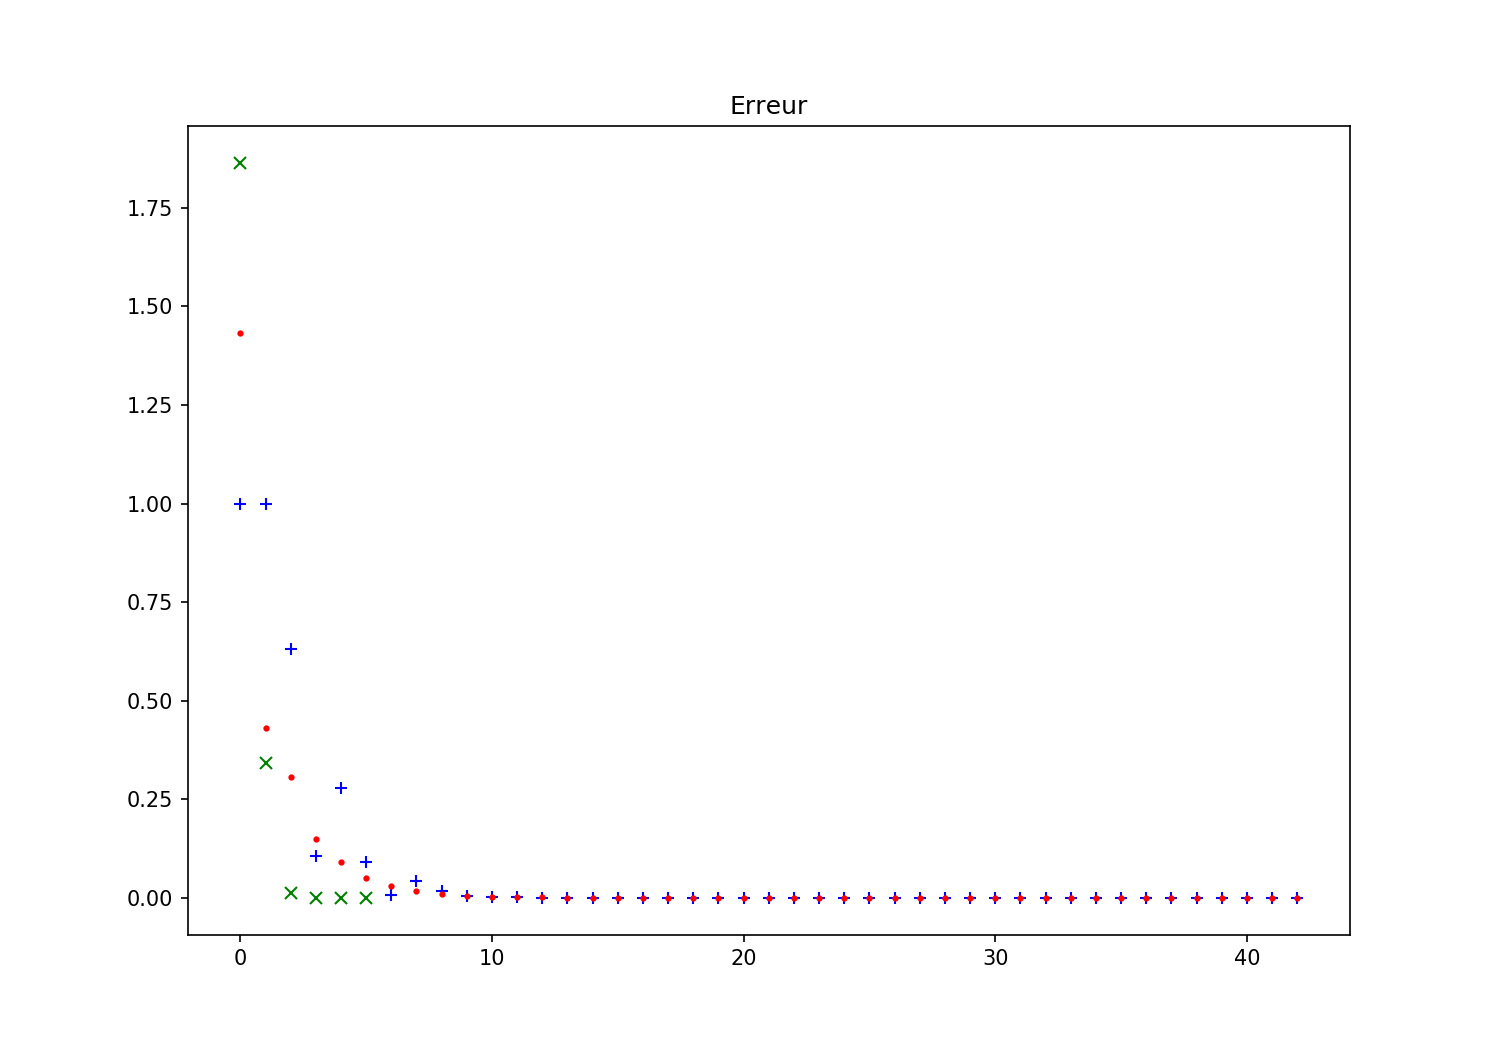

In [35]:
plt.close()

def un(n,a=2):
    if n==0:
        return a
    else:
        return np.exp(-un(n-1,a))

shift=0

plt.plot(range(shift,len(c_dich)), [np.abs(g(c_dich[i])) for i in range(shift,len(c_dich))], 'b+')
rg = range(0,30)
plt.plot(range(shift,len(c_dich)), [np.abs(un(n)-W) for n in range(shift,len(c_dich))], 'ro',markersize=2)
plt.plot(range(len(c_Newt)), [np.abs(g(x)) for x in c_Newt], 'gx')
#plt.axis([0, 20, 0, 3])

plt.title('Erreur')
plt.show()



